# DFT Benchmark
by [Alexander Rodionov](https://github.com/tandav)
#### Task for Operational Calculus
DFT of the 1D array x. 
- [Uses matrix-vector multiplication](https://en.wikipedia.org/wiki/DFT_matrix#Definition)
- [dft matrix at DuckDuckGo](https://duckduckgo.com/?q=dft+matrix&bext=msl&atb=v71-4__&iax=images&ia=images)

In [50]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # 10 x 10 inches plot

## My DFT implementation

In [51]:
def my_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

## check if `my_dft` computes dft correctly
[`allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) checks if 2 array have equal values. Default absolute tolerance is `1e-08`

In [43]:
a = np.array([10, 2, 34, 5, 228, 1488, 22, 9])
np.allclose(my_dft(a), np.fft.fft(a))

True

## Benchmark

In [42]:
N = np.arange(1, 10000, 500)
lib = []
my  = []

for n in N:
    x = np.random.random(n)

    t0 = time()
    X = np.fft.fft(x)
    lib.append(time() - t0)

    t0 = time()
    X = my_dft(x)
    my.append(time() - t0)

    print('\r', n, f'my_dft time: {my[-1]} seconds', end='') # print progress

 9501 my_dft time: 10.390076875686646 secondss

## Plot

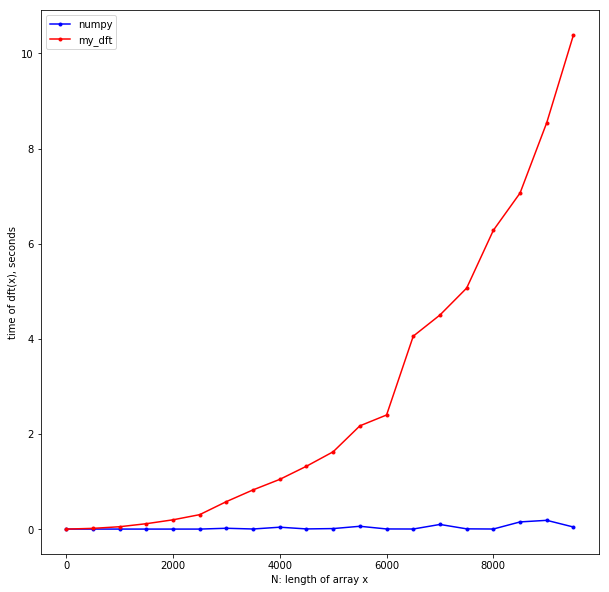

In [47]:
plt.plot(N, lib, 'b.-', label='numpy')
plt.plot(N, my , 'r.-', label='my_dft')
plt.xlabel('N: length of array x')
plt.ylabel('time of dft(x), seconds')
plt.legend()
plt.show()